In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/priv/debass/DES/SIMS/hostlib/output_hostlib_mpi/SFH_mpi/fixed/with_neb_av0-1/all_model_params_quench_BC03_z0.0005_1.10000_av0.00_1.00_rv_rand_full_age_dists_neb_U-2.00_res_1_beta_1.14_combined.h5'
# Load the data using the known key
df_hostlib = pd.read_hdf(file_path, key='main')
print(df_hostlib.head())


     z          mass          ssfr      mean_age        Av        Rv delta  \
0  0.0  1.421176e+11  1.104153e-13  12248.307889  0.000000  3.620931  None   
1  0.0  1.421176e+11  1.104153e-13  12248.307889  0.052632  2.949875  None   
2  0.0  1.421176e+11  1.104153e-13  12248.307889  0.105263  3.781637  None   
3  0.0  1.421176e+11  1.104153e-13  12248.307889  0.157895  3.352393  None   
4  0.0  1.421176e+11  1.104153e-13  12248.307889  0.210526  3.410240  None   

        U_R  pred_rate_x1_hi  pred_rate_x1_lo  ...          V          R  \
0  1.869068         0.000224         0.004613  ... -21.597308 -22.198026   
1  1.906794         0.000224         0.004613  ... -21.544661 -22.155344   
2  1.927799         0.000224         0.004613  ... -21.492198 -22.110455   
3  1.968519         0.000224         0.004613  ... -21.439547 -22.068229   
4  1.999374         0.000224         0.004613  ... -21.387007 -22.024708   

           I      sdssu      sdssg      sdssr      sdssi      sdssz  \
0 -

In [4]:
print(df_hostlib)
print(df_hostlib['z'])
print(df_hostlib.columns)
print(df_hostlib['pred_rate_total'])
print(np.min(df_hostlib['ssfr']), np.max(df_hostlib['ssfr']))



          z          mass          ssfr      mean_age        Av        Rv  \
0      0.00  1.421176e+11  1.104153e-13  12248.307889  0.000000  3.620931   
1      0.00  1.421176e+11  1.104153e-13  12248.307889  0.052632  2.949875   
2      0.00  1.421176e+11  1.104153e-13  12248.307889  0.105263  3.781637   
3      0.00  1.421176e+11  1.104153e-13  12248.307889  0.157895  3.352393   
4      0.00  1.421176e+11  1.104153e-13  12248.307889  0.210526  3.410240   
...     ...           ...           ...           ...       ...       ...   
98115  0.95  1.132756e+08  2.155523e-09    404.020490  0.789474  2.756447   
98116  0.95  1.132756e+08  2.155523e-09    404.020490  0.842105  2.559367   
98117  0.95  1.132756e+08  2.155523e-09    404.020490  0.894737  2.329150   
98118  0.95  1.132756e+08  2.155523e-09    404.020490  0.947368  2.715955   
98119  0.95  1.132756e+08  2.155523e-09    404.020490  1.000000  2.403123   

      delta       U_R  pred_rate_x1_hi  pred_rate_x1_lo  ...          V  \


In [3]:
# Prepare data
import numpy as np
x_mass = np.log10(df_hostlib["mass"])
y_color = df_hostlib["U_R"]
x_age = df_hostlib["mean_age"] / 1000  # Convert to Gyr
# Data
redshift = df_hostlib["z"]
mass = np.log10(df_hostlib["mass"])
ssfr = df_hostlib["ssfr"]
mean_age = df_hostlib["mean_age"] / 1000  # Gyr
Av = df_hostlib["Av"]
m_r= df_hostlib["m_r"]
Rv = df_hostlib["Rv"]
y_color = df_hostlib["U_R"]
pred_rate = df_hostlib["pred_rate_total"]
sdssr = df_hostlib["sdssr"]



## plot predicted rate vs mass

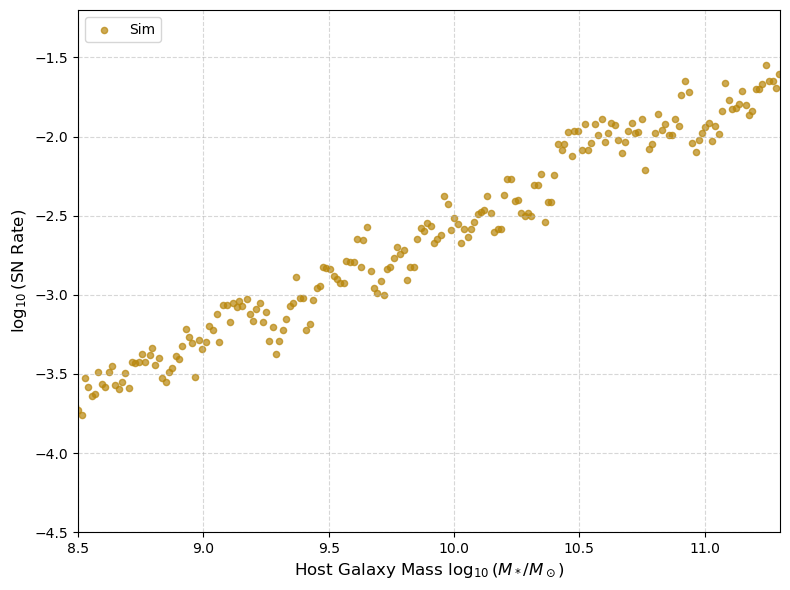

In [7]:


# Binning
bins = np.linspace(8, 12, 300)  # 50 bins between 8 and 12
bin_indices = np.digitize(x_mass, bins)

x_mass_binned = []
avg_pred_rate = []

for i in np.unique(bin_indices):
    mask = bin_indices == i
    if np.any(mask):  # avoid empty bins
        x_mass_binned.append(np.mean(x_mass[mask]))
        avg_pred_rate.append(np.mean(pred_rate[mask]))

x_mass_binned = np.array(x_mass_binned)
avg_pred_rate = np.array(avg_pred_rate)

# Fit (linear regression in log space)
coeffs = np.polyfit(x_mass_binned, np.log10(avg_pred_rate), 1)
fit_line = np.polyval(coeffs, x_mass_binned)

# Plot
plt.figure(figsize=(8, 6))

plt.scatter(
    x_mass_binned,
    np.log10(avg_pred_rate),
    color='darkgoldenrod',
    s=20,
    alpha=0.7,
    label="Sim"
)



# Formatting
plt.xlim(8.5, 11.3)
plt.ylim(-4.5, -1.2)
plt.xlabel(r"Host Galaxy Mass $\log_{10}(M_*/M_\odot)$", fontsize=12)
plt.ylabel(r"$\log_{10}(\mathrm{SN\ Rate})$", fontsize=12)
#plt.title("Predicted Rate vs Mass (Binned)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(loc="upper left", fontsize=10, frameon=True)

plt.tight_layout()
plt.show()


In [8]:

# Compute all U-R variants
U_R_bessel_vega = df_hostlib["U"] - df_hostlib["R"]
U_R_sdss_AB = df_hostlib["sdssu"] - df_hostlib["sdssr"]
U_R_sdss_vega = df_hostlib["U_R"]


In [9]:
#observational data

input_csv = "df_merged.csv"
obs_data= pd.read_csv(input_csv)
obs_color= obs_data["HOST_COLOR"]
obs_mass= obs_data["HOST_LOGMASS"]


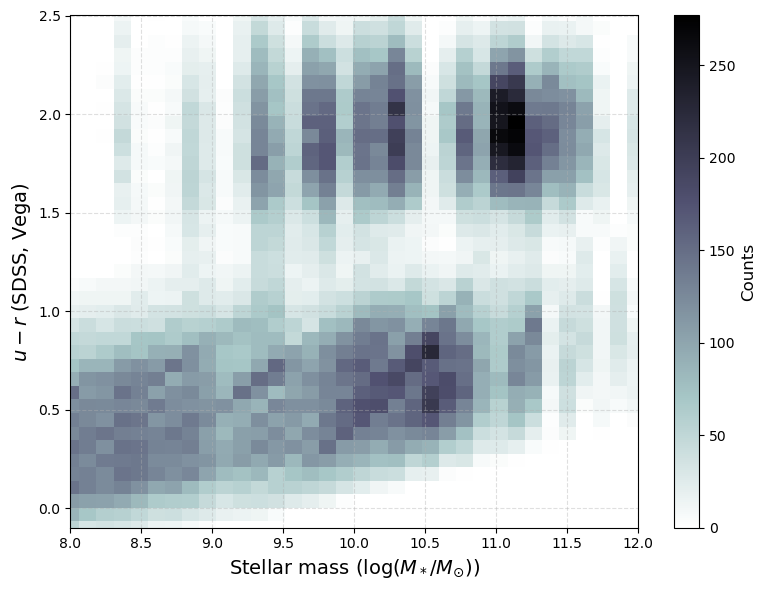

In [10]:
plt.figure(figsize=(8, 6))  # bigger figure

# 2D histogram
hb = plt.hist2d(
    mass, U_R_sdss_vega, 
    bins=[50, 50],      # finer bins
    cmap='bone_r'
)

# Labels & title
plt.xlabel('Stellar mass ($\log(M_*/M_{\odot})$)', fontsize=14)
plt.ylabel('$u-r$ (SDSS, Vega)', fontsize=14)
#plt.title('2D Histogram of U-R vs Mass', fontsize=16)

# Colorbar
cbar = plt.colorbar(hb[3])
cbar.set_label('Counts', fontsize=12)

# Limits & grid
plt.xlim(8, 12)
plt.ylim(-0.1, 2.5)
plt.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


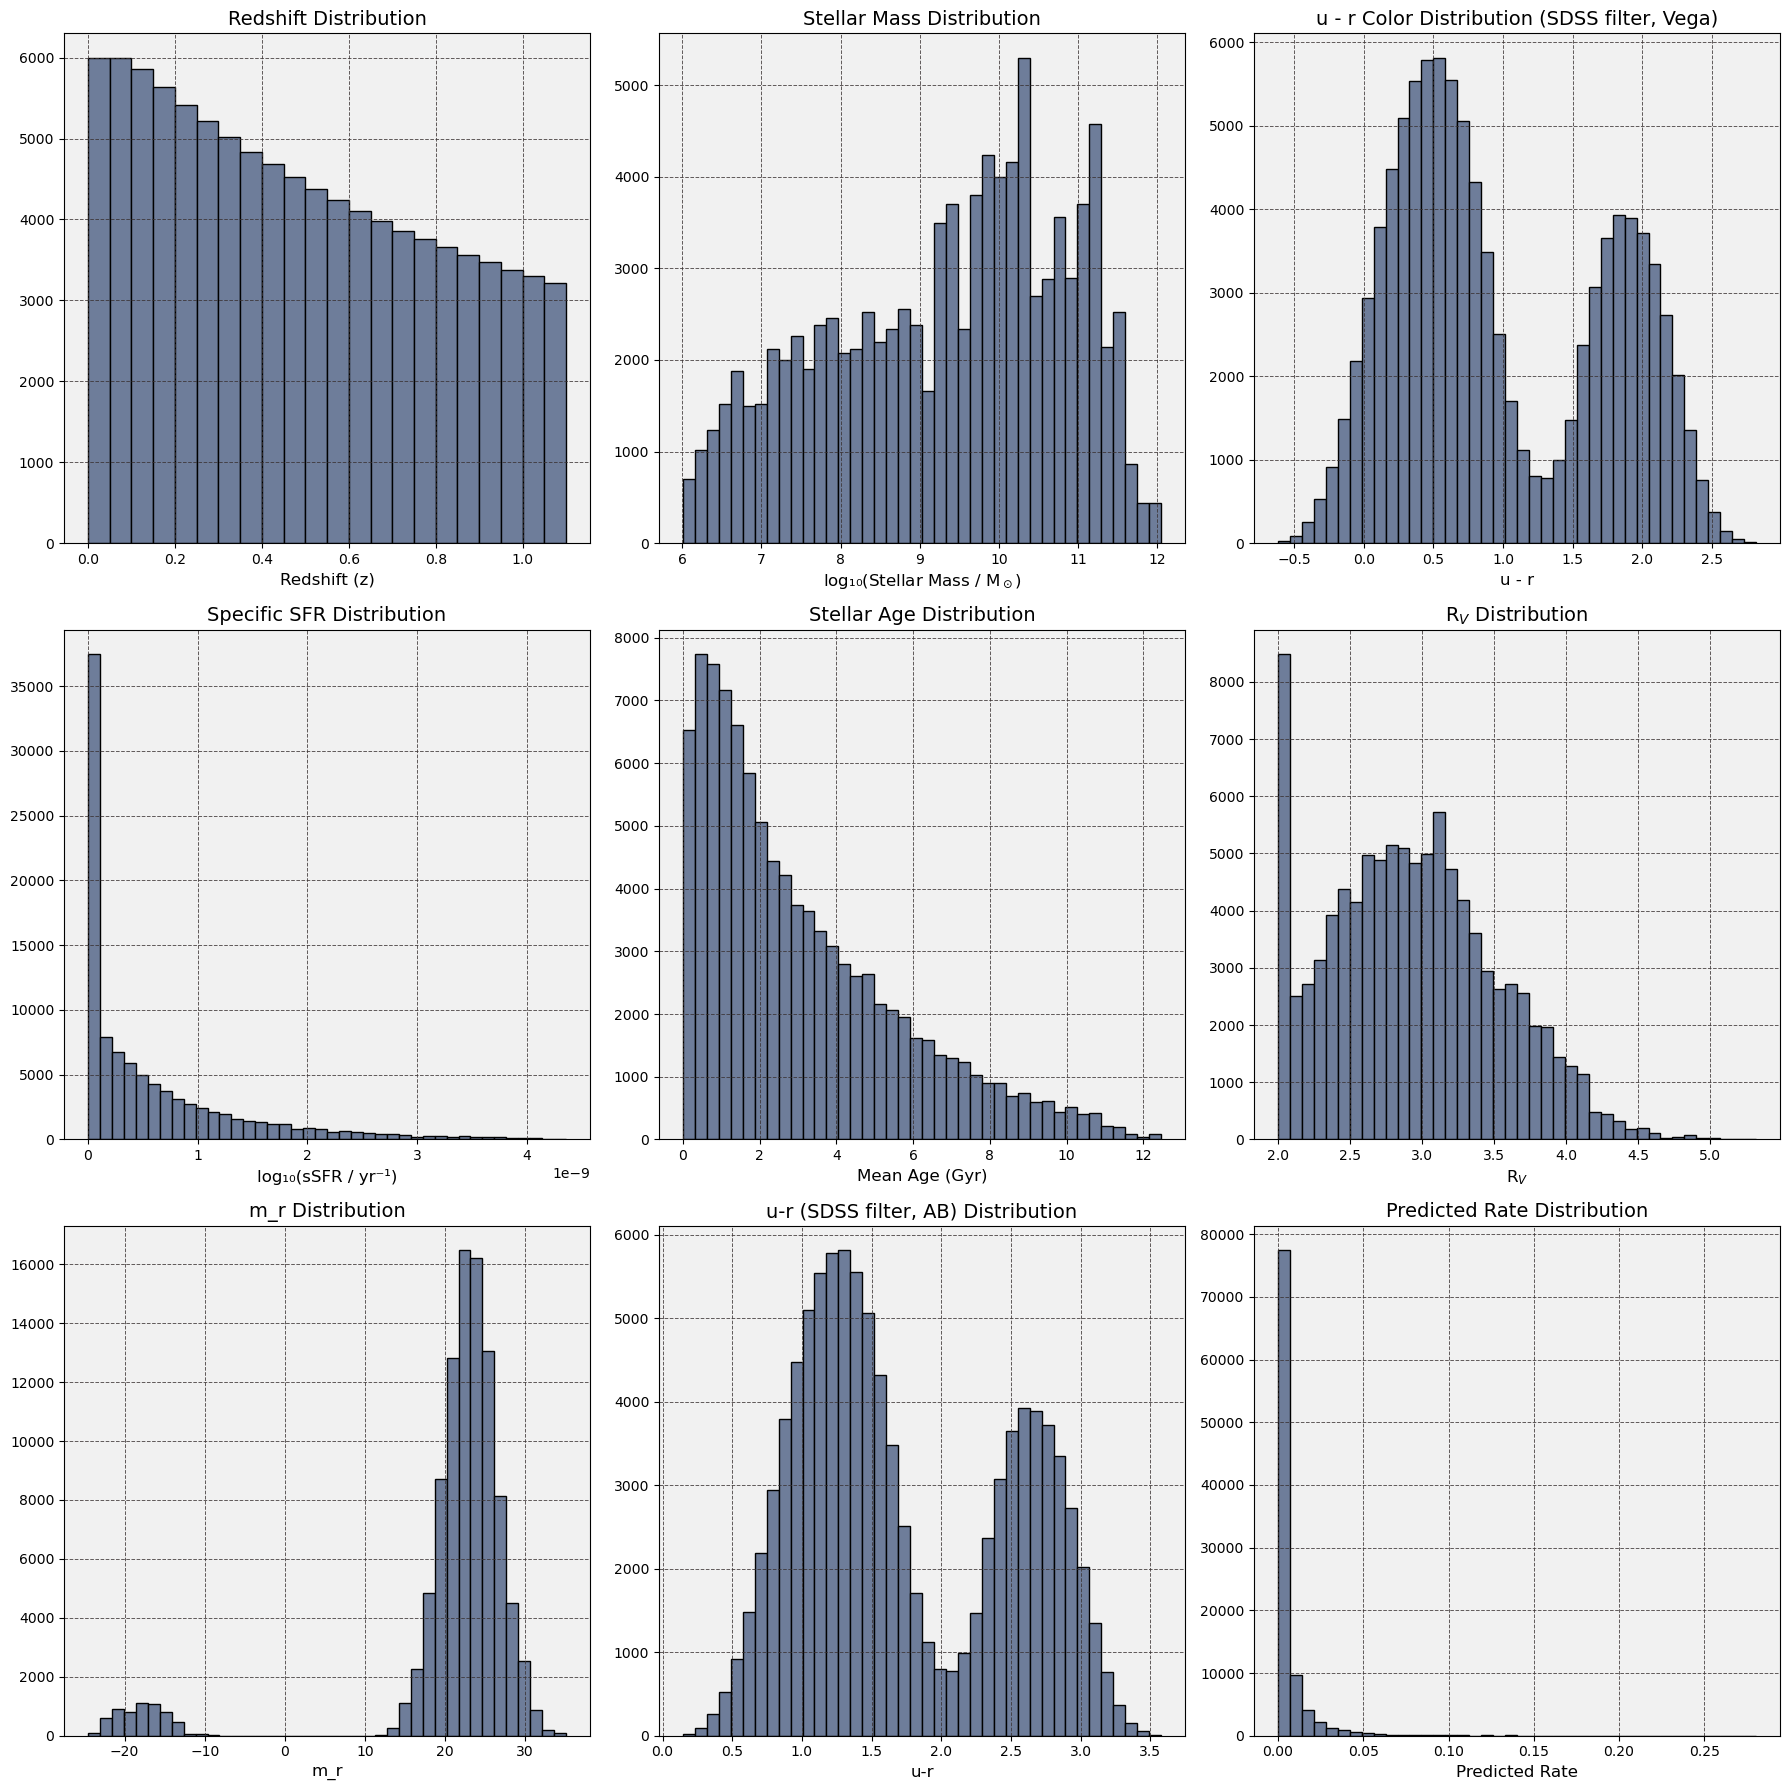

In [11]:
# Choose a single bright color (e.g., a bright blue)
hist_color = "#6E7D9A"

fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# Plot configs: (data, bins, xlabel, title)
plot_data = [
    (redshift, np.arange(0, 1.15, 0.05), "Redshift (z)", "Redshift Distribution"),
    (mass, 40, "log₁₀(Stellar Mass / M$_\odot$)", "Stellar Mass Distribution"),
    (y_color, 40, "u - r", "u - r Color Distribution (SDSS filter, Vega)"),
    (ssfr, 40, "log₁₀(sSFR / yr⁻¹)", "Specific SFR Distribution"),
    (mean_age, 40, "Mean Age (Gyr)", "Stellar Age Distribution"),
    (Rv, 40, "R$_V$", "R$_V$ Distribution"),
    (m_r, 40, "m_r", "m_r Distribution"),
    (U_R_sdss_AB, 40, "u-r", "u-r (SDSS filter, AB) Distribution"),
    (pred_rate, 40, "Predicted Rate", "Predicted Rate Distribution")    
    
]

for ax, (data, bins, xlabel, title) in zip(axs.flatten(), plot_data):
    ax.hist(data, bins=bins, color=hist_color, edgecolor="black")
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.grid(True, linestyle="--", linewidth=0.7, alpha=0.8, color="#3A3232")
    ax.tick_params(axis='both', labelsize=10)
    ax.set_facecolor("#f1f1f1")  # light background for subplot

plt.tight_layout()
plt.show()
